In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Telco Customer Churn

https://www.kaggle.com/blastchar/telco-customer-churn

In [41]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
df.shape

(7043, 21)

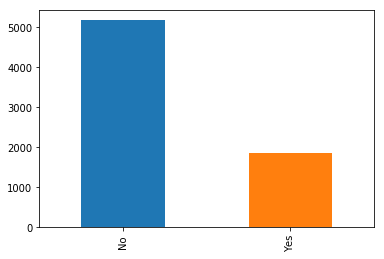

In [21]:
df.Churn.value_counts().plot.bar()

In [148]:
# Build Model = 70% of the data
# Test = 30% of the data
# Randomize the datset
np.random.seed(0)
idx = list(df.index)
np.random.shuffle(idx)
df = df.iloc[idx]

In [149]:
test_idx = int(df.shape[0]*0.7)
df_test = df.iloc[test_idx:]
df = df.iloc[:test_idx]

In [172]:
df = df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [150]:
df.shape

(4930, 21)

In [151]:
df_test.shape

(2113, 21)

In [152]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [153]:
def drop_columns(df):
    return df.drop(columns=['customerID',])

In [154]:
df = drop_columns(df)
df_test = drop_columns(df_test)

In [35]:
def encode_non_numerical(df):
    df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
    df['Partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['Dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['PhoneService'] = df['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['PaperlessBilling'] = df['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
        
    def str_to_float(v):
        try:
            return float(v)
        except ValueError:
            return 0
    
    df['TotalCharges'] = df['TotalCharges'].apply(str_to_float)
    
    multiple = ['MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'Contract',
              'PaymentMethod']
    
    return pd.get_dummies(data=df, columns=multiple)    

In [50]:
df = encode_non_numerical(df)
df_test = encode_non_numerical(df_test)

In [157]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

In [158]:
df_test.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

In [159]:
def move_label_to_front(df):
    columns = list(df.columns)
    columns.remove('Churn')
    columns = ['Churn'] + columns
    
    return pd.DataFrame(data=df, columns=columns)

In [160]:
df = move_label_to_front(df)
df_test = move_label_to_front(df_test)

In [161]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,0,0,0,0,0,19,1,0,58.20,1045.25,...,1,0,0,0,1,0,0,0,1,0
4627,0,1,0,0,0,60,1,1,116.60,7049.50,...,0,0,1,0,1,0,0,1,0,0
3225,0,0,0,0,0,13,1,1,71.95,923.85,...,0,0,1,1,0,0,0,0,1,0
2828,0,1,0,0,0,1,1,0,20.45,20.45,...,0,1,0,0,0,1,0,0,0,1
3768,0,0,0,1,0,55,1,1,77.75,4266.40,...,1,0,0,1,0,0,0,1,0,0


In [162]:
df_test.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1959,0,0,0,1,1,5,0,0,34.25,163.55,...,1,0,0,1,0,0,0,0,1,0
6228,0,1,0,0,1,70,1,0,64.95,4551.50,...,1,0,0,0,1,0,1,0,0,0
4025,1,1,0,0,0,4,1,1,74.80,321.90,...,1,0,0,1,0,0,1,0,0,0
3506,0,1,0,0,0,19,1,1,84.75,1651.95,...,1,0,0,1,0,0,0,0,1,0
3897,0,0,0,1,1,72,1,1,115.50,8425.15,...,0,0,1,0,0,1,0,0,1,0


In [173]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(0)
idx = list(df.index)
np.random.shuffle(idx)
df = df.iloc[idx]

In [175]:
df = df.reset_index(drop=True)

In [176]:
rows = df.shape[0]
train = int(.7 * rows)
validate = int(.3 * rows)

In [177]:
rows, train, validate

(4930, 3451, 1479)

In [181]:
columns = list(df.columns)

In [183]:
# Write Training Set
df[:train].to_csv('telco_train.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [184]:
# Write Validation Set
df[train:].to_csv('telco_validation.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [186]:
# Test Data has only input features
df_test.to_csv('telco_test.csv'
               ,index=False
               , columns=columns[1:])

In [197]:
df_test.to_csv('telco_test_truth.csv'
         ,index=False
         ,columns=['Churn'])

In [187]:
','.join(columns)

'Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check'

In [188]:
# Write Column List
with open('telco_train_column_list.txt','w') as f:
    f.write(','.join(columns))